# EDA on Iris Dataset

## Data Acquisition
There are various formats for a dataset: __.csv, .json, .xlsx__ etc. The dataset can be stored in different places, on your local machine or sometimes online.


In this case, the Iris Dataset is an online source, and it is in a __CSV (comma separated value)__ format. We load it in Jupyter Notebook.

In [2]:
#importing pandas library 
import pandas as pd
import numpy as np

## Read Data
We use __pandas.read_csv()__ function to read the csv file.The file path can be either an URL or a local file address.
Because the data does not include headers, we can add an argument __headers = None__ inside the read_csv() method so that pandas will not automatically set the first row as a header.

In [3]:
#reading the online file by the URL and assignning it to the variable "df"
file_path = r"C:\Users\lenovo\Documents\EdaProjects\iris.data"
df = pd.read_csv(file_path, header=None)

In [4]:
#looking at the first few rows of the dataframe
print('The first 5 rows of the dataframe are: ')
print(df.head())

The first 5 rows of the dataframe are: 
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [5]:
#looking at the bottom rows of the datframe
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#df.shape shows us the total rows and columns in the dataset
df.shape


(150, 5)

## Add Headers
Take a look at our dataset. Pandas automatically set the header with an integer starting from 0.

To better describe our data, we can introduce a header.

Thus, we have to add headers manually.

First, we create a list __"headers"__ that include all column names in order. Then, we use __dataframe.columns = headers__ to replace the headers with the list we created.

In [7]:
#creating headers list
headers = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
df.columns = headers
print(df.columns)
df.head()

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Missing Values 
We will check if our data contains any missing values or not. Missing values can occur when no information is provided for one or more items or for a whole unit. We will use the __isnull() method__.

In [8]:
#to check for NULL values 
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

We see that the data has __no missing value.__

## Checking for duplicates

We use pandas method: __drop_duplicates()__ to check if our data has any duplicate values.

In [9]:
#to see if the data has duplicates and to drop them
data = df.drop_duplicates(subset='class')
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


We see that our dataset has three unique species of iris flower. Let us further see if they all have entries i.e. if the data is balanced or not. We do this by pandas method: __value_counts()__ and it'll return a series containing count of all the unique values.

In [10]:
df.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

As seen in the output, all the species have __equal amount of rows.__

## Basic Insight of Dataset
It is time for us to explore the dataset.
We'll use several ways to obtain essential insights of the data to help us better understand our dataset.

## Data Types
Data has a variety of types.
The main types stored in Pandas dataframes are __object, float, int, bool__ and __datetime64__. In order to better learn about each attribute, it is always good for us to know the data type of each column. We check that by using __.dtypes"__ which return a series with the datatype of each column.

In [11]:
df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

As we can see above, all the columns have correct data type so there is no need to do any changes.

## Describe
To get the statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:
__dataframe.describe()___
This method will provide various summary statistics, excluding NaN (Not a Number) values. 

In [12]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


However, if we would also like to check all the columns including those that are of type object
,we can add an argument __include = "all"__ inside the bracket. Let's try it again.

In [13]:
df.describe(include='all')

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Now it provides the statistical summary of all the columns, including object-typed attributes.
We can now see how many unique values there, which one is the top value and the frequency of top value in the object-typed columns.

Some values in the table above show as "NaN". This is because those numbers are not available regarding a particular column type.

We can also select specefic columns from the dataset and apply __.describe()__ method to those columns to get their statistics.

In [14]:
df[['sepal length in cm', 'petal length in cm']].describe()

,sepal length in cm,petal length in cm
count,150.000000,150.000000
mean,5.843333,3.758667
std,0.828066,1.764420
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


## Info
Another method you can use to check your dataset is:
__dataframe.info()__
It provides a concise summary of your DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [15]:
df.info

<bound method DataFrame.info of      sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal width in cm           class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3          

## Saving Dataset
Pandas allows us to save our __df__ in the __csv__ file format. We can do this by __.to_csv()__ method. (Here, __index=False__ means that the row names will not be written.

In [16]:
df.to_csv('iris_eda.csv', index=False)

## Data Visualization


Let's analyze individual feature patterns using visualization. We will use __seaborn__ and __matplotlib__ libraries for this. 
Let us start by visualizing __class__ column using __countplot.__

In [18]:
#importing the packages
import seaborn as sns
import matplotlib.pyplot as plt

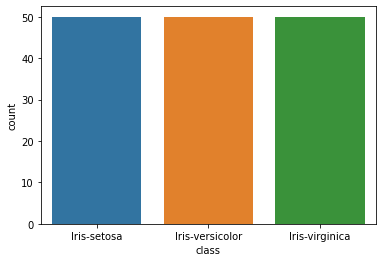

In [19]:
sns.countplot(x='class', data=df,)
plt.show()

Let's study the __correlation__ between different variables in the dataframe.

In [20]:
df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.109369,0.871754,0.817954
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


__Heatmap__ is a data visualization technique that is used to analyze the dataset as colors in two dimensions. 
Basically, it shows a correlation between all numerical variables in the dataset.
So, we plot the above-found correlation using the heatmaps.

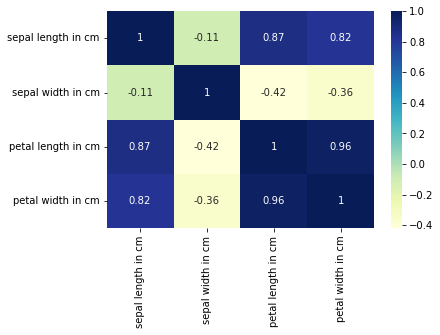

In [21]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the above graph, we can see that

1. Petal width and petal length have __high correlation.__
2. Petal length and sepal width have __good correlations.__
3. Petal Width and Sepal length have __good correlations.__

## Linear relationships
In order to start understanding the (linear) relationship between an variables, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. Let's find the scatter plot between __sepal length__ and __sepal width.__

<AxesSubplot:xlabel='sepal length in cm', ylabel='sepal width in cm'>

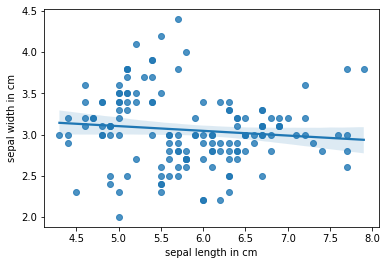

In [22]:
#to see the relationship between sepal length and sepal width 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.regplot(x='sepal length in cm', y='sepal width in cm',data=df)
#lt.ylim(0,)

The regression line in the plot is close to the horizontal. Also, the data points are scattered and far from the fitted line, showing lots of variability.

Let's find the scatter plot for __petal length__ and __petal width__.

(0.0, 2.7199834388192823)

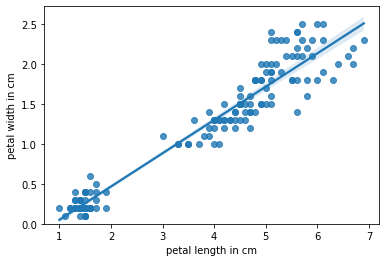

In [23]:
sns.regplot(x='petal length in cm', y='petal width in cm',data=df)
plt.ylim(0,)

We see a __positive__ linear relationship between these two variables as: the petal length increases with the in petal width.

<AxesSubplot:xlabel='class', ylabel='petal length in cm'>

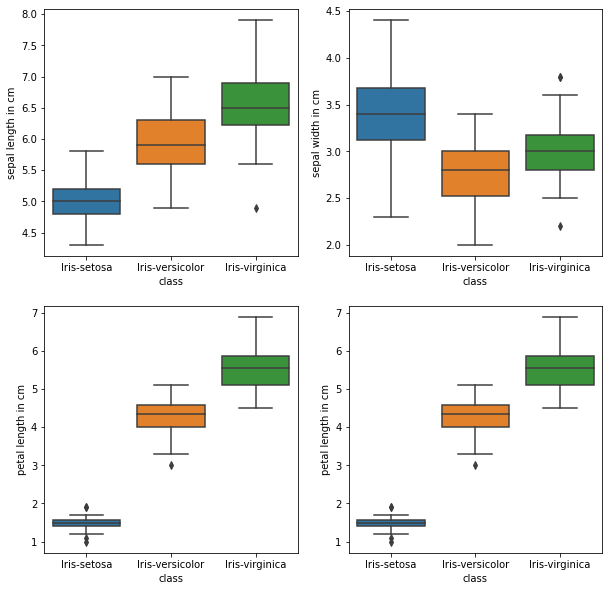

In [24]:
#we can use boxplot to see how the categorical values i.e. class vary with other numerical values

plt.figure(figsize=(10,10))

#adding the subplots at specified grid location
plt.subplot(221)
sns.boxplot(x='class', y='sepal length in cm', data=df)

plt.subplot(222)
sns.boxplot(x='class', y='sepal width in cm', data=df)

plt.subplot(223)
sns.boxplot(x='class', y='petal length in cm', data=df)

plt.subplot(224)
sns.boxplot(x='class', y='petal length in cm', data=df)



From the above graph, we can see that:
1. __Class Setosa__ has the smallest features and less distributed with some outliers.
2. __Class Versicolor__ has the average features.
3. __Class Virginica__ has the highest features.

Let's calculate the __average sepal__ length & width, petal length & width of different iris species.


In [25]:
df_group = df[['class', 'sepal length in cm']]
df_group_test = df_group.groupby(['class'], as_index=False).mean()
df_group_test

,class,sepal length in cm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


In [26]:
df_group = df[['class', 'sepal width in cm']]
df_group_test = df_group.groupby(['class'], as_index=False).mean()
df_group_test

,class,sepal width in cm
0,Iris-setosa,3.418
1,Iris-versicolor,2.770
2,Iris-virginica,2.974


In [27]:
df_group = df[['class', 'petal length in cm']]
df_group_test = df_group.groupby(['class'], as_index=False).mean()
df_group_test

,class,petal length in cm
0,Iris-setosa,1.464
1,Iris-versicolor,4.260
2,Iris-virginica,5.552


In [28]:
df_group = df[['class', 'petal width in cm']]
df_group_test = df_group.groupby(['class'], as_index=False).mean()
df_group_test

,class,petal width in cm
0,Iris-setosa,0.244
1,Iris-versicolor,1.326
2,Iris-virginica,2.026


Let us now compare all three classes of iris flower in the same graph

## comparing sepal length and sepal width 

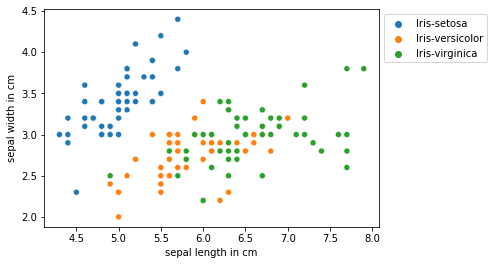

In [29]:
sns.scatterplot(x='sepal length in cm', y='sepal width in cm',
                hue='class', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot, we can infer that – 

1. Setosa has smaller sepal lengths but larger sepal widths.
2. Versicolor Species lies in the middle of the other two species in terms of sepal length and width
3. Virginica has larger sepal lengths but smaller sepal widths.

## Comparing petal length and petal width 

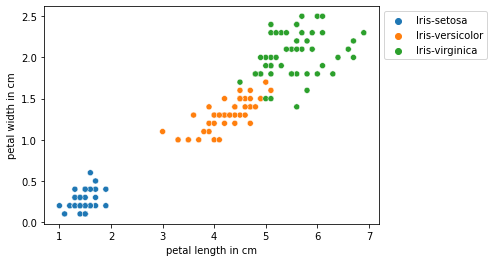

In [30]:
sns.scatterplot(x='petal length in cm', y='petal width in cm',
                hue='class', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot, we can infer that – 

1. Setosa has smaller petal lengths and widths.
2. Species lies in the middle of the other two species in terms of petal length and width
3. Virginica has the largest of petal lengths and widths.